In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random

grid_size = 100
grid = np.ones((grid_size, grid_size))

start = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
goal = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))

# Place obstacles randomly on the grid
num_obstacles = 500
for _ in range(num_obstacles):
    x, y = random.randint(0, grid_size-1), random.randint(0, grid_size-1)
    if (x, y) != start and (x, y) != goal:
        grid[x, y] = 0  # 0 represents an obstacle

# MDP Elements
actions = ['up', 'down', 'left', 'right']
rewards = np.full((grid_size, grid_size), -0.1)  # Small negative reward for each move
rewards[goal] = 10  # Reward for reaching the goal
for x, y in zip(*np.where(grid == 0)):
    rewards[x, y] = -5  # High negative reward for obstacles


In [25]:
# Q-learning parameters
q_table = np.zeros((grid_size, grid_size, len(actions)))
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate


action_map = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Step function
def step(state, action):
    x, y = state
    dx, dy = action_map[action]
    new_x, new_y = x + dx, y + dy
    
    # Ensure new state is within bounds
    if 0 <= new_x < grid_size and 0 <= new_y < grid_size:
        if grid[new_x, new_y] == 1: 
            return (new_x, new_y), rewards[new_x, new_y]
    return state, -5  

# Q-learning function
def q_learning_step(state):
    global epsilon
    x, y = state
    # Epsilon-greedy action selection
    if random.uniform(0, 1) < epsilon:
        action_index = random.randint(0, len(actions) - 1)
    else:
        action_index = np.argmax(q_table[x, y])

    action = actions[action_index]
    next_state, reward = step(state, action)
    nx, ny = next_state
    
    # Q-learning update
    best_next_action = np.argmax(q_table[nx, ny])
    q_table[x, y, action_index] += alpha * (reward + gamma * q_table[nx, ny, best_next_action] - q_table[x, y, action_index])
    
    return next_state, reward

def train_sample(start, steps=10):
    state = start
    path = [state]
    for _ in range(steps):
        state, _ = q_learning_step(state)
        path.append(state)
        if state == goal:
            break
    return path


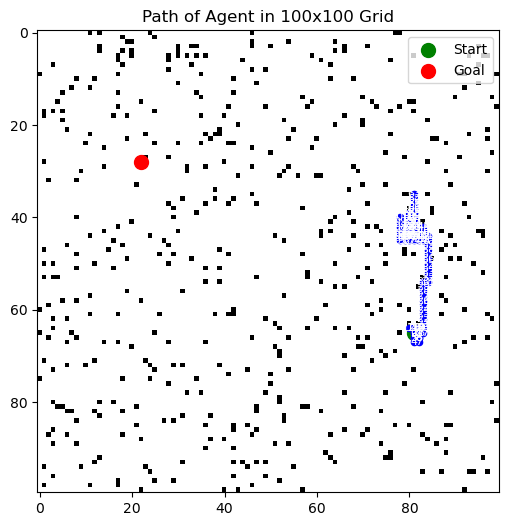

In [33]:
# Visualization
def visualize_path(grid, path):
    plt.figure(figsize=(8, 6))
    plt.imshow(grid, cmap='gray', origin='upper')

    # Plot start, goal, and path
    plt.scatter(start[1], start[0], color='green', label="Start", s=100)
    plt.scatter(goal[1], goal[0], color='red', label="Goal", s=100)
    
    # Plot agent's path
    for step, (x, y) in enumerate(path):
        plt.scatter(y, x, color="blue", s=20)
        plt.text(y, x, str(step), color="white", ha="center", va="center", fontsize=8)

    plt.legend()
    plt.title("Path of Agent in 100x100 Grid")
    plt.show()

sample_path = train_sample(start, steps=100)
visualize_path(grid, sample_path)
